In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , Input
import numpy as np
print("Version of tensorflow is : ",tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

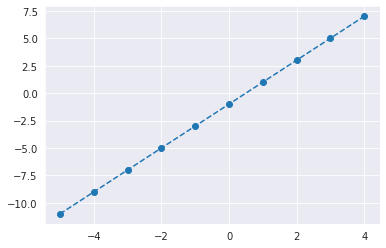

In [4]:
xs = np.arange(-5,5,1).astype('float32')
ys = xs * 2 - 1
plt.plot(xs , ys,'o--')

Model using **MSE** loss

In [7]:
input = Input(shape=(1,) , name="input_layer")
output_layer = Dense(1 , name="output_layer")(input)
model_mse_loss = tf.keras.models.Model(inputs=input , outputs=output_layer)
model_mse_loss.compile(optimizer="sgd" , loss="mse")
model_mse_loss.fit(xs,ys,epochs=500,verbose=0)
model_mse_loss.predict([[10.0]])

array([[19.000095]], dtype=float32)

In [13]:
model_mse_loss.get_weights()

[array([[2.000004]], dtype=float32), array([-0.9999439], dtype=float32)]

Model with **Huber** Loss

In [10]:
def huber_loss(y_true , y_pred):
    thresold = 1
    error = y_true - y_pred
    return_type = tf.abs(error) <= thresold
    r1 = 0.5 * tf.square(error)
    r2 = thresold * (tf.abs(error) - (0.5*thresold))
    return tf.where(return_type , r1 , r2)

In [11]:
input = Input(shape=(1,) , name="input_layer")
output_layer = Dense(1 , name="output_layer")(input)
model_huber_loss = tf.keras.models.Model(inputs=input , outputs=output_layer)
model_huber_loss.compile(optimizer="sgd" , loss=huber_loss)
model_huber_loss.fit(xs,ys,epochs=500,verbose=0)
model_huber_loss.predict([[10.0]])

array([[19.019892]], dtype=float32)

In [12]:
model_huber_loss.get_weights()

[array([[2.0007935]], dtype=float32), array([-0.98804367], dtype=float32)]